# King County Housing Sales Data

Lets take a look at the King County Housing Data from 1999-2022 to see if we can uncover some interesting insights in regards to if the COVID pandemic affected housing in King County dramatically

Dataset: https://www.kaggle.com/datasets/andykrause/kingcountysales

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
df = pd.read_csv('C:/Users/Raymnd Diaz/Desktop/Data/kingcountysales.csv').drop('Unnamed: 0',axis=1)

In [4]:
df.head()

,sale_id,pinx,sale_date,sale_price,sale_nbr,sale_warning,join_status,join_year,latitude,longitude,...,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket
0,1999..144,..2734100475,1999-01-05,150000,1,,demo,1999,47.544359,-122.320786,...,0,0,0,0,0,0,0,0,0,E
1,1999..258,..1535200725,1999-01-05,235000,1,,demo,1999,47.421247,-122.438139,...,0,0,2,0,0,0,0,0,0,H
2,1999..331,..6028000255,1999-01-04,293000,1,,demo,1999,47.572103,-122.122257,...,0,0,0,0,0,0,0,0,0,R
3,1999..660,..6145600690,1999-01-08,164000,1,,demo,1999,47.703824,-122.347166,...,0,0,0,0,0,0,0,0,0,B
4,1999..775,..1939800005,1999-01-07,270000,1,,demo,1999,47.764482,-122.208069,...,0,0,0,0,0,0,0,0,0,Q


In [5]:
df.columns

Index(['sale_id', 'pinx', 'sale_date', 'sale_price', 'sale_nbr',
       'sale_warning', 'join_status', 'join_year', 'latitude', 'longitude',
       'area', 'city', 'zoning', 'subdivision', 'present_use', 'land_val',
       'imp_val', 'year_built', 'year_reno', 'sqft_lot', 'sqft', 'sqft_1',
       'sqft_fbsmt', 'grade', 'fbsmt_grade', 'condition', 'stories', 'beds',
       'bath_full', 'bath_3qtr', 'bath_half', 'garb_sqft', 'gara_sqft', 'wfnt',
       'golf', 'greenbelt', 'noise_traffic', 'view_rainier', 'view_olympics',
       'view_cascades', 'view_territorial', 'view_skyline', 'view_sound',
       'view_lakewash', 'view_lakesamm', 'view_otherwater', 'view_other',
       'submarket'],
      dtype='object')

## What does the average sale price look like in King County from 1999-2022

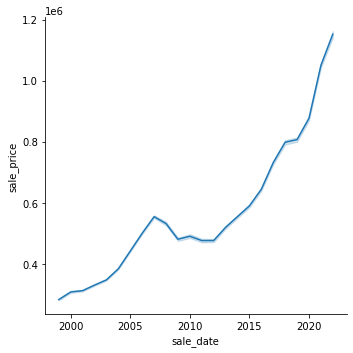

In [6]:
sns.relplot(data=df,x=pd.DatetimeIndex(df['sale_date']).year,y='sale_price',kind='line')

We can see that since 1999 there has been a steady increase in the sale price except for the dip in 2007-2010 when there was a housing crash

## What does the average sale price look like before COVID vs during COVID vs after COVID?

In [7]:
before = df[(df['sale_date'] < '2020-02-01') & (df['sale_date'] > '2018-01-01')]
during = df[(df['sale_date'] >= '2020-02-01') & (df['sale_date'] < '2022-01-01')]
after = df[df['sale_date'] >= '2022-01-01']

In [8]:
before_price = before['sale_price'].mean()
during_price = during['sale_price'].mean()
after_price = after['sale_price'].mean()

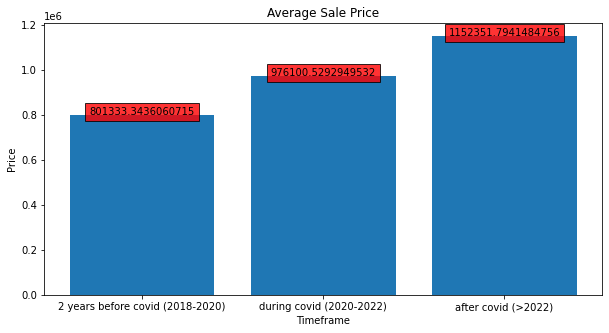

In [12]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', bbox = dict(facecolor = 'red', alpha =.8))

        
if __name__ == '__main__':
    
    x = ['2 years before covid (2018-2020)', 'during covid (2020-2022)', 'after covid (>2022)']
    y = [before_price, during_price, after_price]
    
    plt.figure(figsize = (10,5))
    
    plt.bar(x,y)
    addlabels(x,y)
    
    plt.ylabel("Price")
    plt.xlabel("Timeframe")
    plt.title("Average Sale Price")
    
    plt.show()

We can see that even though there was a pandemic that happened between 2020-2022, the housing prices still steadily increased in King County.

# Are there different correlations between during COVID prices vs after COVID prices?

In [10]:
during_corr = during.corr()
during_corr.style.background_gradient(cmap='coolwarm')

,sale_price,sale_nbr,join_year,latitude,longitude,area,present_use,land_val,imp_val,year_built,year_reno,sqft_lot,sqft,sqft_1,sqft_fbsmt,grade,fbsmt_grade,condition,stories,beds,bath_full,bath_3qtr,bath_half,garb_sqft,gara_sqft,wfnt,golf,greenbelt,noise_traffic,view_rainier,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other
sale_price,1.000000,0.016882,-0.241247,0.303193,0.056721,-0.012348,-0.114144,0.663887,0.497422,-0.027510,0.112562,0.098662,0.495114,0.385539,0.234768,0.460474,0.152218,-0.008608,0.106568,0.226524,0.212407,0.168596,0.151305,0.031368,0.146338,0.244532,0.037728,0.055462,-0.014192,0.058980,0.162248,0.110100,0.307172,0.170461,0.102620,0.406195,0.148074,0.035637,0.071697
sale_nbr,0.016882,1.000000,-0.079753,-0.039260,0.040935,0.045018,-0.077336,-0.051664,-0.007621,-0.067815,0.048554,-0.011311,-0.020641,-0.018443,-0.022909,-0.036920,-0.041123,0.133002,-0.042324,-0.011458,0.064613,-0.108047,0.037578,-0.024655,0.025515,-0.015801,0.011138,0.045174,0.014817,-0.010674,-0.015227,-0.001423,-0.009330,0.001738,-0.021983,-0.013087,0.003698,-0.008868,0.005431
join_year,-0.241247,-0.079753,1.000000,-0.101558,0.092863,0.083166,0.086362,0.174303,0.276451,0.297927,-0.258417,-0.007389,0.134480,0.017988,0.068472,0.190408,0.088796,0.063016,0.130143,0.126424,0.137088,0.100850,0.127907,0.056442,0.142143,-0.072401,0.011612,0.042240,-0.023559,0.003937,-0.051216,-0.015101,-0.057012,-0.033054,-0.069405,-0.101362,-0.019968,-0.034064,-0.022430
latitude,0.303193,-0.039260,-0.101558,1.000000,-0.185400,-0.217108,0.169985,0.313680,0.172074,-0.156841,0.046031,-0.063095,0.011664,-0.060464,0.147010,0.110833,0.215010,-0.029912,0.051175,-0.059132,-0.056929,0.109556,-0.051669,0.104425,-0.211617,-0.024812,-0.009113,0.005844,0.093511,-0.079894,0.029348,-0.004846,0.033485,0.033549,-0.013096,0.065531,0.021141,-0.021293,0.005539
longitude,0.056721,0.040935,0.092863,-0.185400,1.000000,0.441349,-0.223986,0.051365,0.242060,0.338556,-0.068254,0.202867,0.294718,0.311571,-0.156335,0.200459,-0.248884,-0.078318,0.082188,0.185717,0.242256,-0.042985,0.179086,-0.074722,0.456691,0.079172,0.047227,0.167005,-0.107111,0.013556,-0.103132,0.020937,-0.081261,-0.036271,-0.174627,-0.023753,0.057707,0.050337,0.076953
area,-0.012348,0.045018,0.083166,-0.217108,0.441349,1.000000,-0.150694,0.015222,0.124726,0.188561,-0.054094,0.119495,0.136911,0.174414,-0.104179,0.063308,-0.170954,-0.027032,0.011082,0.098165,0.126764,-0.038745,0.093101,-0.053815,0.276220,0.036521,0.029118,0.102184,-0.069799,-0.008610,-0.054111,-0.018998,-0.050725,-0.039576,-0.054763,-0.043207,0.012670,0.007544,0.013850
present_use,-0.114144,-0.077336,0.086362,0.169985,-0.223986,-0.150694,1.000000,-0.127012,-0.075796,0.387116,-0.065521,-0.101997,-0.248731,-0.466998,-0.073502,0.091464,0.189302,-0.237900,0.464394,-0.287980,-0.097512,0.074195,0.076382,0.083211,-0.256599,-0.036782,-0.021244,-0.024033,0.072314,-0.029951,-0.037530,-0.040123,-0.068678,-0.012972,-0.040854,-0.043098,-0.022828,-0.015776,-0.013369
land_val,0.663887,-0.051664,0.174303,0.313680,0.051365,0.015222,-0.127012,1.000000,0.391896,-0.072938,0.036906,0.037869,0.374498,0.325760,0.248312,0.360264,0.162632,0.069368,0.008678,0.183079,0.128373,0.171090,0.111392,0.046819,0.106905,0.220434,0.032083,0.063115,0.012326,0.056286,0.136216,0.071723,0.258079,0.177933,0.062666,0.346857,0.129535,0.027165,0.071274
imp_val,0.497422,-0.007621,0.276451,0.172074,0.242060,0.124726,-0.075796,0.391896,1.000000,0.355212,0.001631,0.114643,0.774542,0.480236,0.212231,0.735454,0.145446,-0.064443,0.354324,0.412244,0.482653,0.224054,0.323599,0.066485,0.404974,0.079158,0.060522,0.130455,-0.055738,0.029956,0.074410,0.098277,0.185448,0.058427,0.051024,0.138591,0.124654,0.015455,0.035087
year_built,-0.027510,-0.067815,0.297927,-0.156841,0.338556,0.188561,0.387116,-0.072938,0.355212,1.000000,-0.224613,0.009567,0.296904,0.001079,-0.156975,0.480899,-0.047339,-0.394340,0.563372,0.157377,0.368209,0.058463,0.351493,0.0

In [11]:
after_corr = after.corr()
after_corr.style.background_gradient(cmap='coolwarm')

,sale_price,sale_nbr,join_year,latitude,longitude,area,present_use,land_val,imp_val,year_built,year_reno,sqft_lot,sqft,sqft_1,sqft_fbsmt,grade,fbsmt_grade,condition,stories,beds,bath_full,bath_3qtr,bath_half,garb_sqft,gara_sqft,wfnt,golf,greenbelt,noise_traffic,view_rainier,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other
sale_price,1.000000,0.027162,-0.222724,0.317752,0.105514,0.012991,-0.124730,0.631095,0.543010,0.023565,0.099510,0.091330,0.527314,0.397253,0.220199,0.494112,0.140813,0.019643,0.131805,0.264265,0.231842,0.184149,0.164934,0.014549,0.198534,0.194706,0.037929,0.067049,-0.005214,0.026341,0.129054,0.106442,0.272415,0.129680,0.092294,0.339799,0.147288,0.029734,0.108248
sale_nbr,0.027162,1.000000,-0.094354,-0.038708,0.063104,0.027035,-0.055354,-0.068871,0.024596,-0.025910,0.048583,-0.015655,-0.000709,-0.017412,-0.026541,-0.016076,-0.043141,0.165316,-0.017280,-0.000271,0.091135,-0.090979,0.048920,-0.018958,0.046931,-0.026774,0.024793,0.046949,0.005367,-0.000447,-0.036347,-0.008783,-0.034445,-0.012500,-0.034581,-0.022266,-0.012273,-0.017155,0.004235
join_year,-0.222724,-0.094354,1.000000,-0.099328,0.092567,0.090312,0.078705,0.188375,0.273253,0.287285,-0.277890,-0.002950,0.146978,0.035471,0.079381,0.193235,0.092695,0.062030,0.120933,0.133310,0.131880,0.101080,0.127951,0.061720,0.138896,-0.059875,0.017578,0.039037,-0.028256,0.002807,-0.017652,-0.010748,-0.044188,-0.034028,-0.056787,-0.066382,-0.005308,-0.032838,-0.026824
latitude,0.317752,-0.038708,-0.099328,1.000000,-0.187458,-0.224898,0.162987,0.344942,0.157074,-0.169125,0.047544,-0.079453,-0.003482,-0.062318,0.135399,0.095009,0.195277,-0.006584,0.043176,-0.068258,-0.070871,0.100713,-0.054824,0.086939,-0.211344,-0.034590,-0.020128,0.007233,0.097016,-0.092251,0.034230,-0.001779,0.027939,0.030664,-0.013103,0.065670,0.022107,-0.032906,0.004320
longitude,0.105514,0.063104,0.092567,-0.187458,1.000000,0.447461,-0.203537,0.042283,0.241713,0.357127,-0.053188,0.236262,0.298721,0.307980,-0.141719,0.202908,-0.228863,-0.035273,0.090672,0.184274,0.241936,-0.016738,0.181361,-0.083646,0.447306,0.071079,0.046823,0.159009,-0.103641,0.027811,-0.109764,0.021847,-0.073710,-0.033553,-0.169740,-0.024575,0.051196,0.061354,0.092755
area,0.012991,0.027035,0.090312,-0.224898,0.447461,1.000000,-0.118646,0.020036,0.111220,0.215829,-0.054623,0.120333,0.131726,0.161263,-0.102073,0.065113,-0.161735,-0.029956,0.019845,0.083692,0.122517,-0.035064,0.089964,-0.067057,0.272916,0.038962,0.025358,0.098901,-0.072754,-0.006493,-0.066673,-0.035443,-0.061524,-0.036577,-0.063563,-0.049597,0.012705,0.014566,0.022273
present_use,-0.124730,-0.055354,0.078705,0.162987,-0.203537,-0.118646,1.000000,-0.125036,-0.042478,0.385534,-0.066330,-0.101895,-0.220263,-0.450192,-0.062373,0.100348,0.193672,-0.198441,0.465861,-0.260243,-0.074792,0.087035,0.090349,0.084896,-0.235165,-0.029243,-0.021760,-0.015055,0.058440,-0.028344,-0.030383,-0.036295,-0.068625,-0.014427,-0.041076,-0.039406,-0.019092,-0.019674,-0.016218
land_val,0.631095,-0.068871,0.188375,0.344942,0.042283,0.020036,-0.125036,1.000000,0.373669,-0.078536,0.027737,0.025712,0.356468,0.303535,0.242672,0.356936,0.162796,0.076020,0.009757,0.175390,0.111887,0.164101,0.094310,0.030309,0.098378,0.195067,0.030071,0.049717,0.018187,0.024730,0.129310,0.086431,0.237997,0.157426,0.068348,0.340094,0.129270,0.019218,0.068809
imp_val,0.543010,0.024596,0.273253,0.157074,0.241713,0.111220,-0.042478,0.373669,1.000000,0.375499,0.009403,0.108587,0.762502,0.458016,0.206626,0.730166,0.153875,-0.025616,0.373364,0.410676,0.457769,0.242696,0.325968,0.054409,0.403555,0.079834,0.065791,0.125446,-0.038991,0.012896,0.066957,0.112362,0.180333,0.041317,0.045489,0.127963,0.126935,0.010574,0.059820
year_built,0.023565,-0.025910,0.287285,-0.169125,0.357127,0.215829,0.385534,-0.078536,0.375499,1.000000,-0.209467,0.018984,0.325374,0.014988,-0.132124,0.494179,-0.021696,-0.314825,0.563072,0.188165,0.377366,0.098989,0.368227,0.07764

Based off of looking at both charts, it appears there are some features that positively increased and negatively decreased

Positively increased:
- gara_sqft (0.052)
- year_built (0.051)
- imp_val (0.045)
- beds (0.037)

Negatively decreased:
- view_lakewash (-0.066)
- wfnt (-0.049)
- view_skyline (-0.047)
- view_territorial (-0.034)

One of my hypothesis is that during COVID and the transition after COVID, many people began buying houses more in suburbs of King County as opposed to living in the city where the view of Lake Washington or the skyine or even having a house on the waterfront are no longer desirable because of the cost to own. Owners are more interested in owning a house that has a higher improved tax value or a bigger garage/more bed rooms and we can see that here in the correlation charts where the features increased/decreased between the timeframes

# What neighbourhoods experienced the biggest growth during COVID and after COVID?

In [62]:
before['timeframe'] = 'before'
during['timeframe'] = 'during'
after['timeframe'] = 'after'
timeframes = pd.concat([before,during,after])

C:\Users\Raymnd Diaz\AppData\Local\Temp\ipykernel_4400\419982357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before['timeframe'] = 'before'
C:\Users\Raymnd Diaz\AppData\Local\Temp\ipykernel_4400\419982357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  during['timeframe'] = 'during'
C:\Users\Raymnd Diaz\AppData\Local\Temp\ipykernel_4400\419982357.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<AxesSubplot:xlabel='count', ylabel='city'>

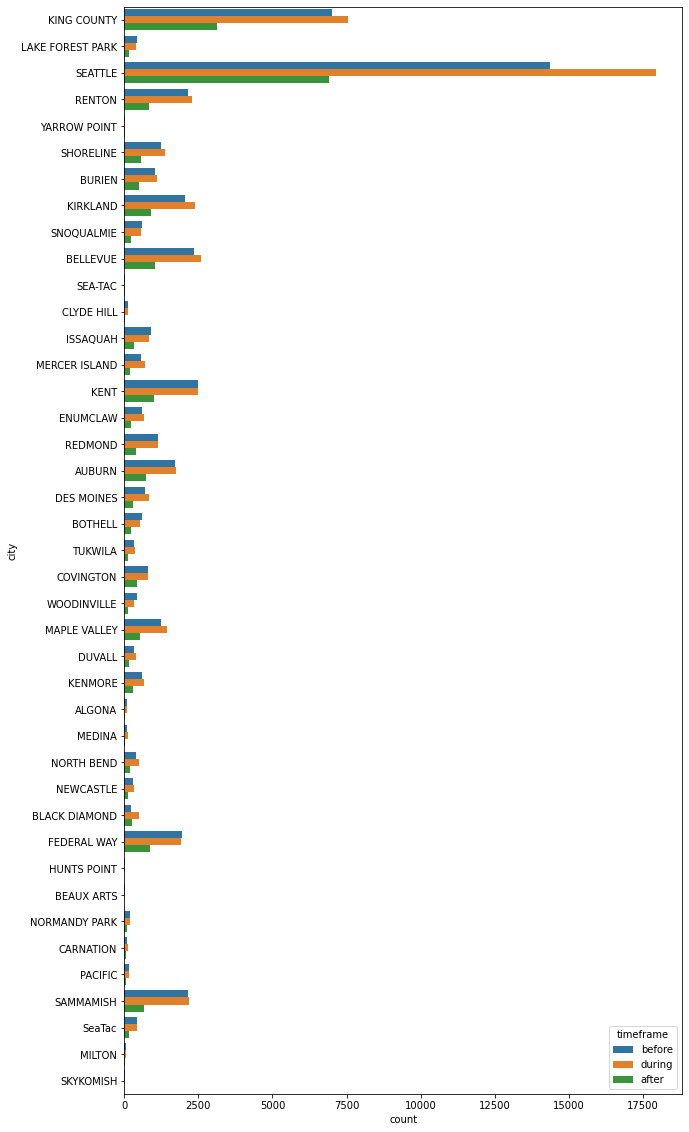

In [70]:
plt.figure(figsize=(10, 20))
sns.countplot(data=timeframes, y='city', orient='h', hue='timeframe')

One of the things that stood out the most in the chart was how many homes were sold in the Seattle area in comparison to the other neighbourhoods in King County. Looking at this chart essentially confirms that people are still buying in the Seattle neighbourhood still regardless of how expensive the housing market is in the area. 

What this chart also confirms to me is that even with a pandemic going on, the housing market in the King County area was still booming and will continue to boom as long as the area continues to be a tech hub for many of the Fortune 500 companies.